## Importing necessary packages ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

## Load data ##

In [2]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Check the data types ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check the correlation for price ##

In [4]:
# Check everyting correlated to price
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corr


price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

## Make a new dataframe with the top 7 columns correlated to price ##

In [5]:
df = df[['price', 'sqft_living', 'grade', 
         'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 
         'waterfront', 'floors', 'sqft_basement']]
df

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement
0,221900.0,1180,7,1180,1340,1.00,0.0,3,NaN,1.0,0.0
1,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400.0
2,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0.0
3,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910.0
4,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0.0
21593,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0.0
21594,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0.0
21595,400000.0,1600,8,1600,1410,2.50,0.0,3,NaN,2.0,0.0


## Check the data types ##

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  int64  
 2   grade          21597 non-null  int64  
 3   sqft_above     21597 non-null  int64  
 4   sqft_living15  21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   view           21534 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   waterfront     19221 non-null  float64
 9   floors         21597 non-null  float64
 10  sqft_basement  21597 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


## Change data types ##

In [7]:
df['price'] = df['price'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
# df['view'] = df['view'].astype(int) #has null values
df['floors'] = df['floors'].astype(int)

## Check the data types again ##

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  int64  
 1   sqft_living    21597 non-null  int64  
 2   grade          21597 non-null  int64  
 3   sqft_above     21597 non-null  int64  
 4   sqft_living15  21597 non-null  int64  
 5   bathrooms      21597 non-null  int64  
 6   view           21534 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   waterfront     19221 non-null  float64
 9   floors         21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
dtypes: float64(2), int64(8), object(1)
memory usage: 1.8+ MB


## Check for null values ##

In [9]:
df.isna().sum()

price               0
sqft_living         0
grade               0
sqft_above          0
sqft_living15       0
bathrooms           0
view               63
bedrooms            0
waterfront       2376
floors              0
sqft_basement       0
dtype: int64

## Drop null values

In [10]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)

## Change data types

In [11]:
df['view'] = df['view'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)

## Plot the data ##

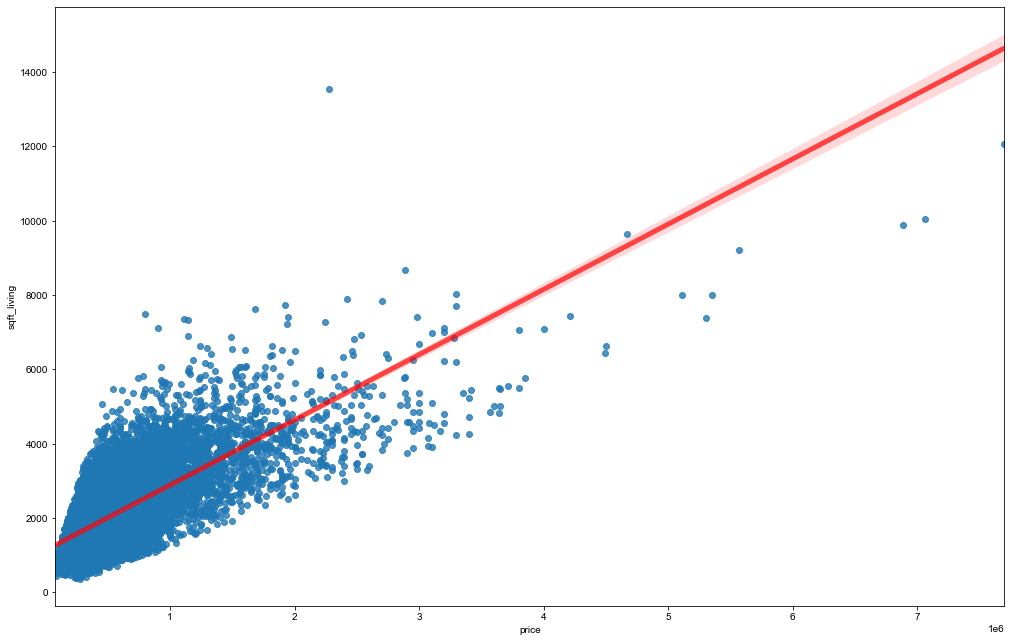

In [12]:
fig, ax,  = plt.subplots(figsize=(15,10))
fig.tight_layout(pad=5.0)
sns.set_style("ticks")

x = df.price
y = df.sqft_living

sns.regplot(x,y, line_kws={"color":"r","alpha":0.7,"lw":5});

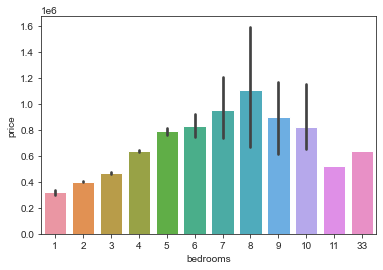

In [13]:
sns.barplot(x="bedrooms", y="price", data=df);

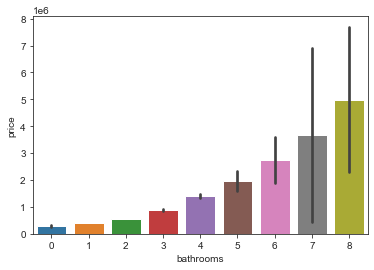

In [14]:
sns.barplot(x="bathrooms", y="price", data=df);

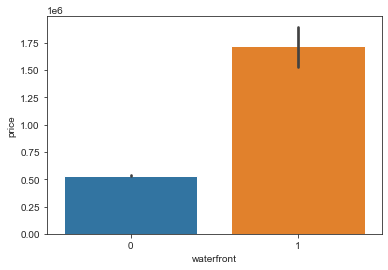

In [15]:
sns.barplot(x="waterfront", y="price", data=df);

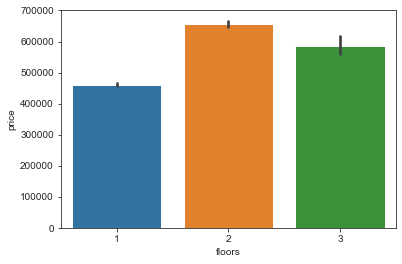

In [16]:
sns.barplot(x="floors", y="price", data=df);

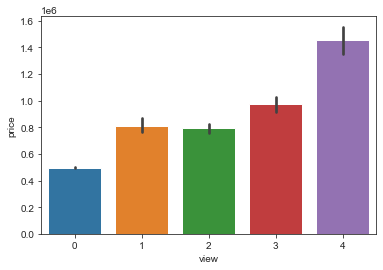

In [17]:
sns.barplot(x="view", y="price", data=df);

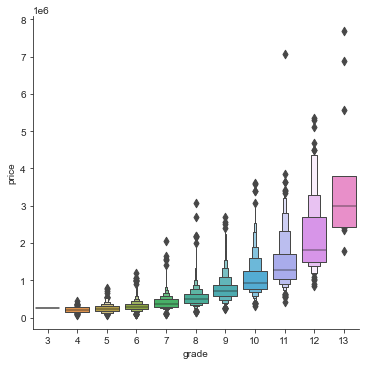

In [18]:
sns.catplot(x="grade", y="price", kind="boxen", data=df.sort_values("grade"));

## Observations ##

1. I noticed that there are a lot of outliers for price
2. There is a lot of categorical data
3. 

## Run a train test split ##

In [19]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [20]:
model_1_train = X_train[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model_1_test = X_test[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model1 = LinearRegression()
model1.fit(model_1_train, y_train)

train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 245850.13606223054
Test error: 243797.09233891615


## Using different features ##

In [21]:
model_2_train = X_train[['sqft_living', 'grade', 
                         'bathrooms', 
                         'bedrooms']]

model_2_test = X_test[['sqft_living', 'grade', 
                         'bathrooms', 
                         'bedrooms']]

model2 = LinearRegression()
model2.fit(model_2_train, y_train)

train_preds = model2.predict(model_2_train)
test_preds = model2.predict(model_2_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 249044.90751682676
Test error: 246939.2330437635


In [22]:
model_3_train = X_train[['sqft_living', 'grade']]

model_3_test = X_test[['sqft_living', 'grade']]

model3 = LinearRegression()
model3.fit(model_3_train, y_train)

train_preds = model3.predict(model_3_train)
test_preds = model3.predict(model_3_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 251252.2940139308
Test error: 248582.45573990542


## Looking at outliers ##

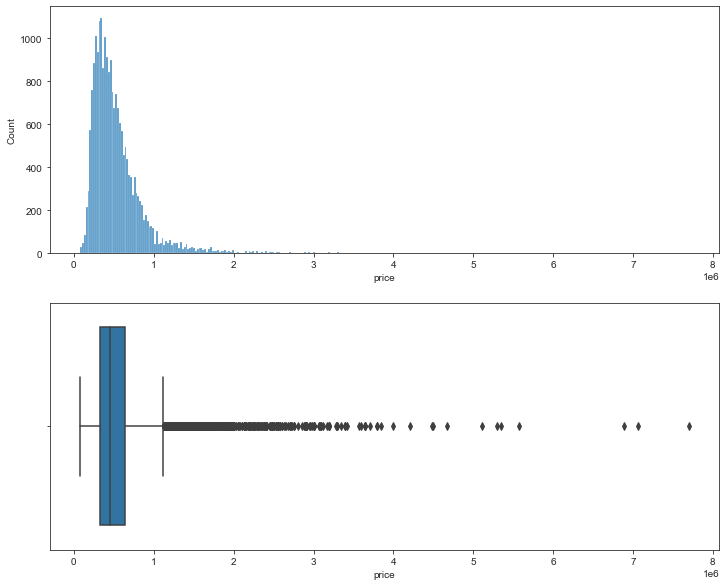

In [23]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=df['price'], ax=ax[0])
sns.boxplot(x=df['price'], ax=ax[1]);

## Remove outliers that are outside of three standard deviations away from the mean ##

In [24]:
price_under_3_std = df[np.abs(stats.zscore(df['price'])) < 3]

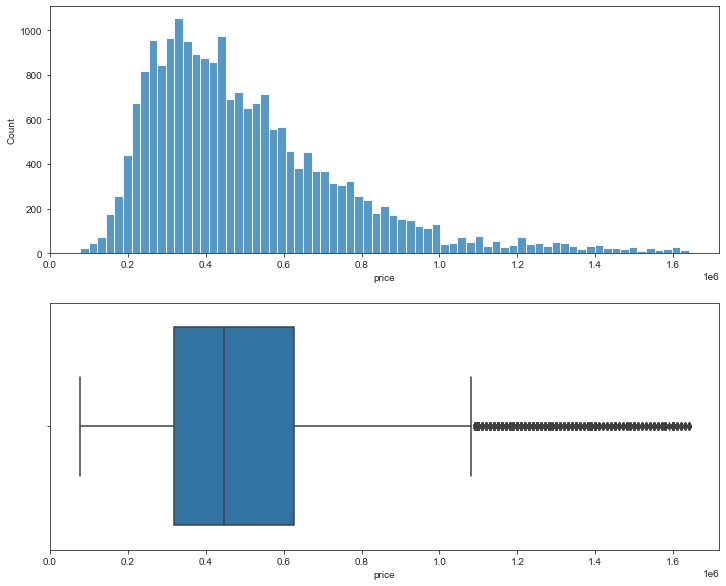

In [25]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=price_under_3_std['price'], ax=ax[0])
sns.boxplot(x=price_under_3_std['price'], ax=ax[1]);

## Checking corrilation after droping outliers ##

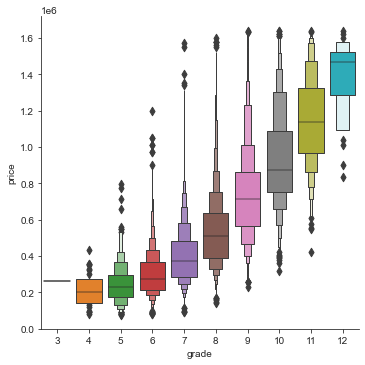

In [26]:
sns.catplot(x="grade", y="price", kind="boxen", data=price_under_3_std.sort_values("grade"));

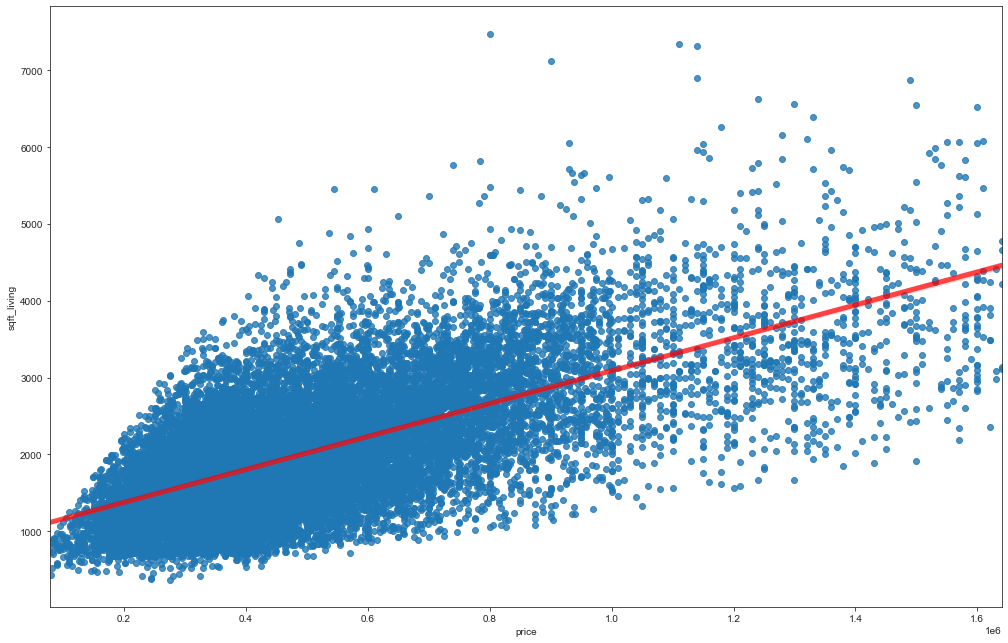

In [27]:
fig, ax,  = plt.subplots(figsize=(15,10))
fig.tight_layout(pad=5.0)
sns.set_style("ticks")

x = price_under_3_std.price
y = price_under_3_std.sqft_living

sns.regplot(x,y, line_kws={"color":"r","alpha":0.7,"lw":5});

## Running a train test split after droping outliers ##

In [28]:
X = price_under_3_std.drop('price', axis = 1)
y = price_under_3_std['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [29]:
model_4_train = X_train[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model_4_test = X_test[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model4 = LinearRegression()
model4.fit(model_4_train, y_train)

train_preds = model4.predict(model_4_train)
test_preds = model4.predict(model_4_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 177656.38231806623
Test error: 176833.68244255587


## Observations ##

After removing the outliers in the price column I noticed that the error decreased by half. I am going to keep removing outliers from the price column to get the error close to zero.

## Remove outliers that are outside of two standard deviations away from the mean ##

In [30]:
price_under_2_std = df[np.abs(stats.zscore(df['price'])) < 2]

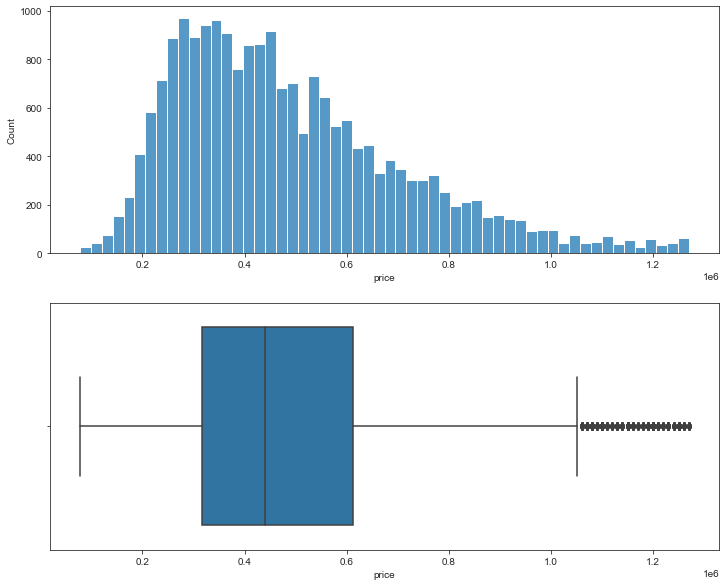

In [31]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=price_under_2_std['price'], ax=ax[0])
sns.boxplot(x=price_under_2_std['price'], ax=ax[1]);

## Running a train test split after droping outliers outside of two standard deviations ##

In [32]:
X = price_under_2_std.drop('price', axis = 1)
y = price_under_2_std['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [33]:
model_5_train = X_train[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model_5_test = X_test[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 
                         'bedrooms', 'floors']]

model5 = LinearRegression()
model5.fit(model_5_train, y_train)

train_preds = model5.predict(model_5_train)
test_preds = model5.predict(model_5_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 159698.79672375578
Test error: 155131.6748496905


## Observations ##

Dropping the outliers that are outside of two standard deviations away from the mean made the error decrease some. I am doing to revisit the original dataframe and add more features to my model to help the error decrasese more.

## Run a train test split after adding features ##

In [34]:
X = price_under_2_std.drop('price', axis = 1)
y = price_under_2_std['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

In [35]:
model_6_train = X_train[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 'view', 
                         'bedrooms', 'waterfront','floors']]

model_6_test = X_test[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 'view', 
                         'bedrooms', 'waterfront','floors']]

model6 = LinearRegression()
model6.fit(model_6_train, y_train)

train_preds = model6.predict(model_6_train)
test_preds = model6.predict(model_6_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 156365.5495477513
Test error: 155519.7785623317


## Evaluate the model ##

Use qcut to cut the price column in quantiles

In [36]:
bined = pd.qcut(price_under_2_std['price'], q = 8)
binned_df = pd.DataFrame(bined)

In [37]:
binned_df['price'].value_counts()

(375000.0, 440000.0]     2618
(440000.0, 520000.0]     2614
(77999.999, 255000.0]    2614
(613275.0, 763000.0]     2596
(317000.0, 375000.0]     2595
(763000.0, 1270000.0]    2593
(255000.0, 317000.0]     2585
(520000.0, 613275.0]     2541
Name: price, dtype: int64

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(model_6_train, y_train)

LinearRegression()

In [40]:
e = lr.predict(model_6_train) - y_train

In [41]:
binned_df['error'] = e
binned_df_dropna = binned_df.dropna()

In [42]:
binned_df_dropna

,price,error
1,"(520000.0, 613275.0]",-72697.231446
2,"(77999.999, 255000.0]",123875.283154
3,"(520000.0, 613275.0]",-168816.877372
5,"(763000.0, 1270000.0]",-49528.676015
6,"(255000.0, 317000.0]",153777.823055
...,...,...
21589,"(520000.0, 613275.0]",26497.916372
21591,"(440000.0, 520000.0]",-39913.955464
21592,"(317000.0, 375000.0]",80366.999846
21593,"(375000.0, 440000.0]",109817.156780


In [43]:
new_df = binned_df.groupby('price').mean()['error']
new_df = pd.DataFrame(new_df).reset_index()

## Plot the quantiles for price along with the corresponding error

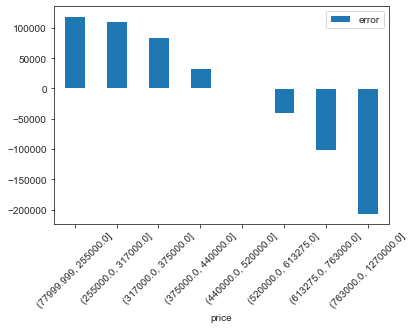

In [44]:
new_df.plot.bar(x = 'price', y = 'error', rot = 45);

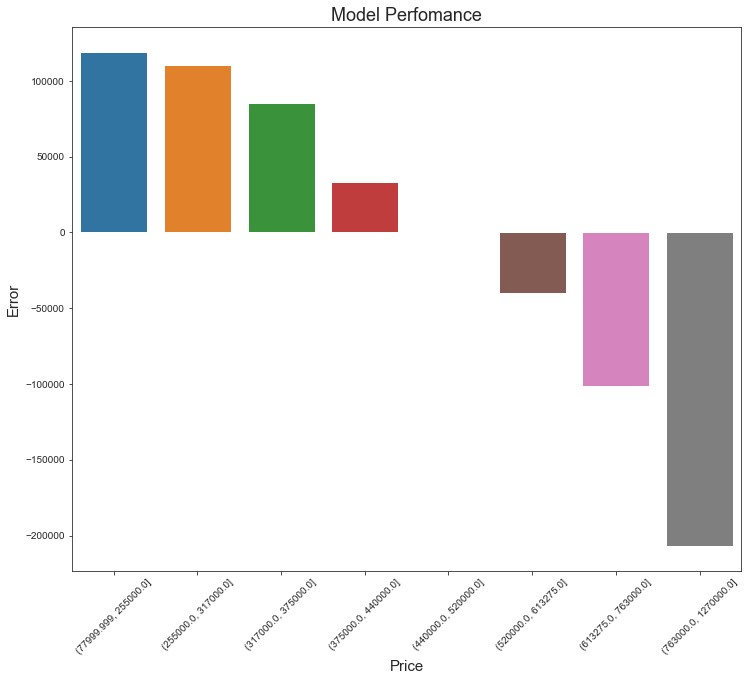

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'price', y = 'error', data = new_df)
plt.xticks(rotation=45)
plt.xlabel('Price',fontsize = 15)
plt.ylabel('Error',fontsize = 15)
plt.title('Model Perfomance',fontsize = 18);

## Remove outliers that are outside of one standard deviations away from the mean

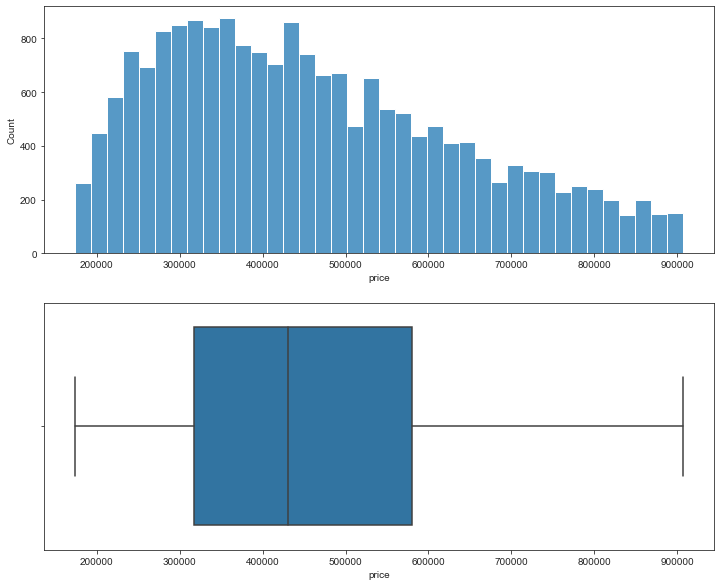

In [47]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=price_under_1_std['price'], ax=ax[0])
sns.boxplot(x=price_under_1_std['price'], ax=ax[1]);

## Running a train test split after droping outliers outside of one standard deviations

In [71]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [72]:
model_7_train = X_train[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 'view', 
                         'bedrooms', 'waterfront','floors']]

model_7_test = X_test[['sqft_living', 'grade', 'sqft_above', 
                         'sqft_living15', 'bathrooms', 'view', 
                         'bedrooms', 'waterfront','floors']]

model_7_train['price'] = y_train
model_7_train = model_7_train[np.abs(stats.zscore(model_7_train['price'])) < 1]
y_train = model_7_train.price
model_7_train.drop('price', axis=1, inplace=True)

model7 = LinearRegression()
model7.fit(model_7_train, y_train)

train_preds = model7.predict(model_7_train)
test_preds = model7.predict(model_7_test)

train_error = mean_squared_error(y_train, train_preds, squared= False)
test_error = mean_squared_error(y_test, test_preds, squared= False)

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 136055.99006899894
Test error: 278302.4486556808


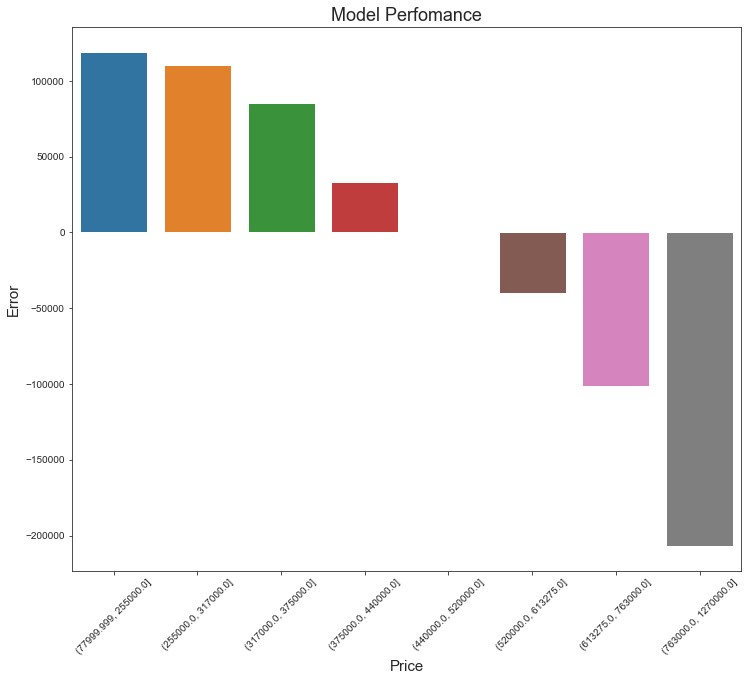

In [60]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'price', y = 'error', data = new_df)
plt.xticks(rotation=45)
plt.xlabel('Price',fontsize = 15)
plt.ylabel('Error',fontsize = 15)
plt.title('Model Perfomance',fontsize = 18);